In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

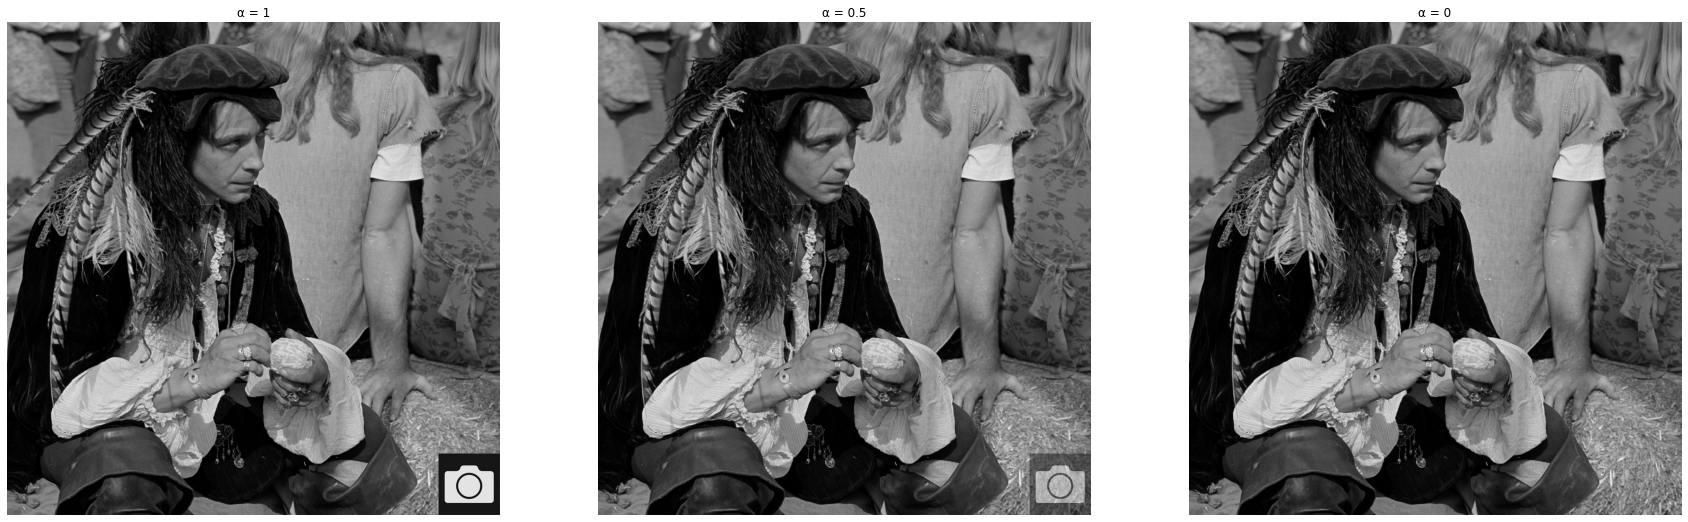

In [2]:
# Exercise 1

im = imread('male.tiff')
watermark = imread('watermark.jpg')

def add_watermark(image, watermark, alpha):
    image = image.copy()
    image[-watermark.shape[0]:, -watermark.shape[1]:] = (1 - alpha) * image[-watermark.shape[0]:, -watermark.shape[1]:] + alpha * watermark
    return image

plt.figure(figsize=(30, 15))
plt.subplot(131), plt.imshow(add_watermark(im, watermark, alpha=1), cmap='gray'), plt.title('α = 1'), plt.axis('off')
plt.subplot(132), plt.imshow(add_watermark(im, watermark, alpha=0.5), cmap='gray'), plt.title('α = 0.5'), plt.axis('off')
plt.subplot(133), plt.imshow(add_watermark(im, watermark, alpha=0), cmap='gray'), plt.title('α = 0'), plt.axis('off')
plt.show()

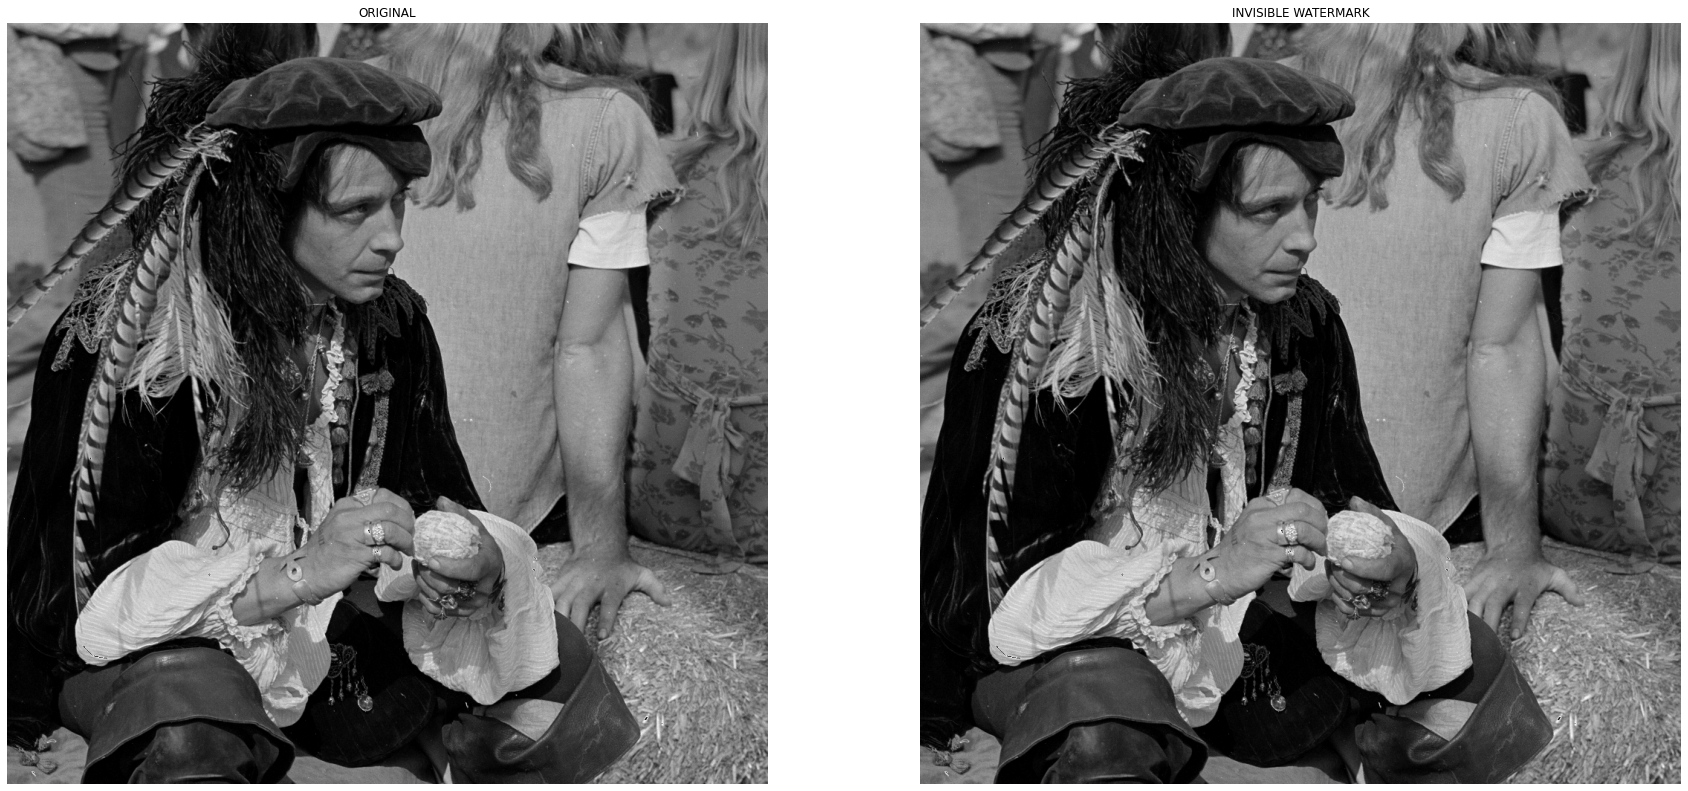

In [3]:
# Exercise 2.1

def add_invisible_watermark(image, watermark):
    image = image.copy()
    image[-watermark.shape[0]:, -watermark.shape[1]:] = 4 * (image[-watermark.shape[0]:, -watermark.shape[1]:] / 4).astype(int) + (watermark / 64).astype(int)
    return image

im_inv = add_invisible_watermark(im, watermark)

plt.figure(figsize=(30, 15))
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.title('ORIGINAL'), plt.axis('off')
plt.subplot(122), plt.imshow(im_inv, cmap='gray'), plt.title('INVISIBLE WATERMARK'), plt.axis('off')
plt.show()

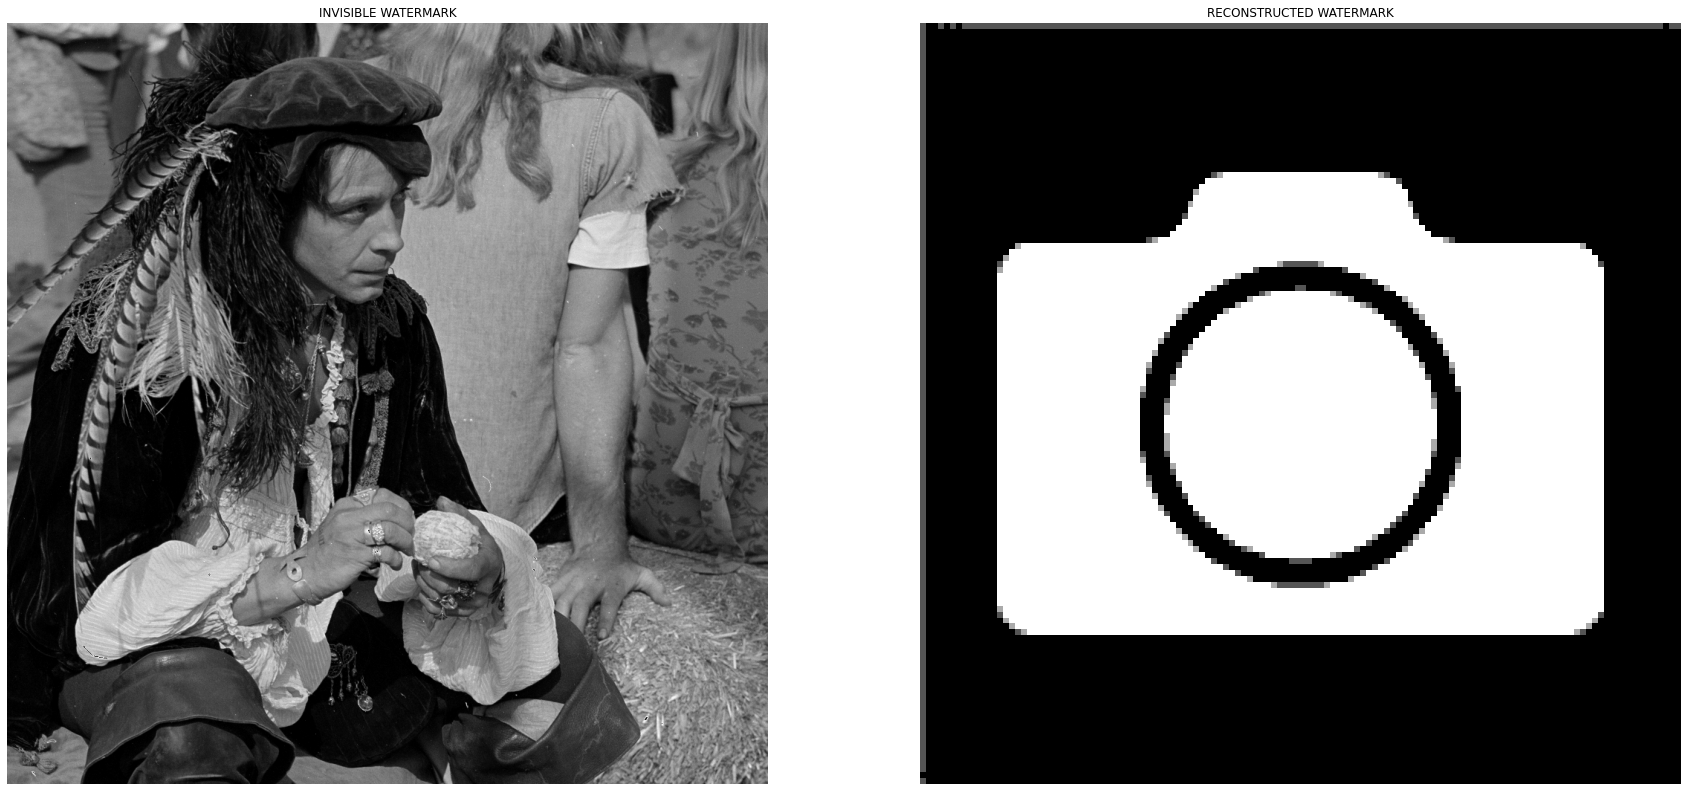

In [4]:
# Exercise 2.2

watermark = im_inv[-128:, -128:]
h, w = watermark.shape

binary = []
for i in range(h):
    for j in range(w):
         binary.append(np.binary_repr(watermark[i][j], width=8))

im1b = (np.array([int(i[7]) for i in binary], dtype=np.uint8) * 1).reshape(h, w)
im2b = (np.array([int(i[6]) for i in binary], dtype=np.uint8) * 2).reshape(h, w)

im_reconstructed = im1b + im2b

plt.figure(figsize=(30, 15))
plt.subplot(121), plt.imshow(im_inv, cmap='gray'), plt.title('INVISIBLE WATERMARK'), plt.axis('off')
plt.subplot(122), plt.imshow(im_reconstructed, cmap='gray'), plt.title('RECONSTRUCTED WATERMARK'), plt.axis('off')
plt.show()

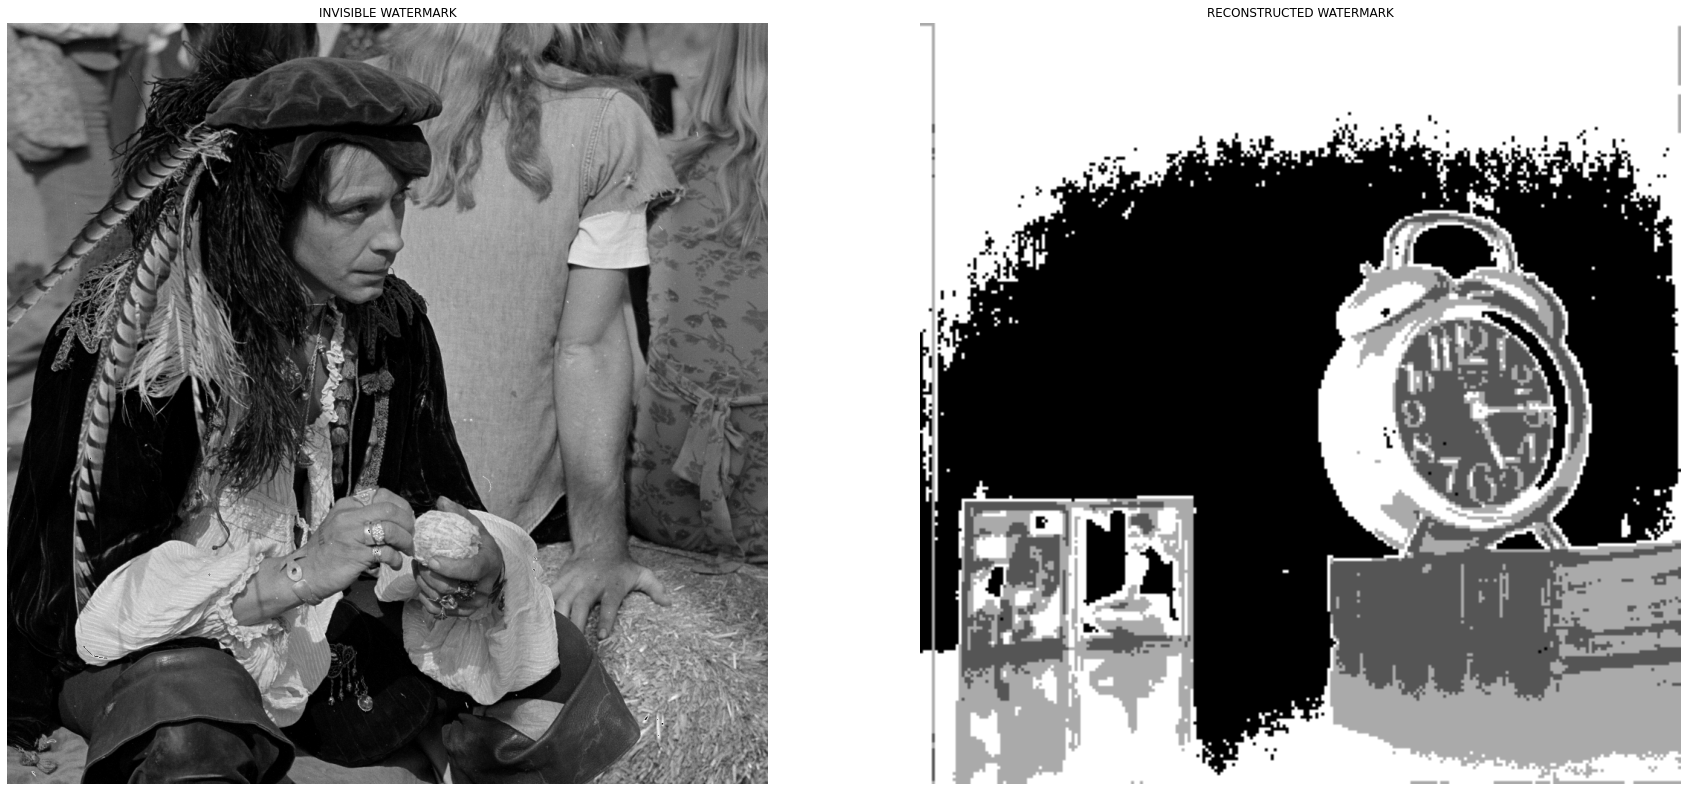

In [5]:
# Exercise 2.3

im_watermarked = imread('maleWatermarked.tiff')
watermark = im_watermarked[-256:, -256:]
h, w = watermark.shape

binary = []
for i in range(h):
    for j in range(w):
         binary.append(np.binary_repr(watermark[i][j], width=8))

im1b = (np.array([int(i[7]) for i in binary], dtype=np.uint8) * 1).reshape(h, w)
im2b = (np.array([int(i[6]) for i in binary], dtype=np.uint8) * 2).reshape(h, w)

im_reconstructed = im1b + im2b

plt.figure(figsize=(30, 15))
plt.subplot(121), plt.imshow(im_watermarked, cmap='gray'), plt.title('INVISIBLE WATERMARK'), plt.axis('off')
plt.subplot(122), plt.imshow(im_reconstructed, cmap='gray'), plt.title('RECONSTRUCTED WATERMARK'), plt.axis('off')
plt.show()